<a href="https://colab.research.google.com/github/jiyanshud22/MTH443-Project/blob/main/MTH443_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comprehensive Analysis of Laptop and Mobile Phone Data

# Table of Contents:
# 1. Data Loading and Preprocessing
# 2. Exploratory Data Analysis (EDA)
# 3. Data Splitting for Model Training
# 4. Feature Comparison
# 5. Price Prediction Models
# 6. Clustering Analysis
# 7. Moore's Law Testing
# 8. Brand Value Analysis
# 9. Comparative Analysis: Laptops vs Mobiles


# Section 1: Data Loading and Initial Exploration


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import re

# Load data from CSV files
laptops_df = pd.read_csv('laptops.csv', encoding='latin-1') # or 'cp1252', or other likely encodings
mobiles_df = pd.read_csv('Mobiles.csv', encoding='latin-1') # Apply the same encoding if needed


# Display basic information about the datasets
print("Laptop Dataset Info:")
print(f"Shape: {laptops_df.shape}")
print(laptops_df.columns.tolist())
print(laptops_df.head())

print("\nMobile Dataset Info:")
print(f"Shape: {mobiles_df.shape}")
print(mobiles_df.columns.tolist())
print(mobiles_df.head())

Laptop Dataset Info:
Shape: (1303, 13)
['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen', 'CPU', 'RAM', ' Storage', 'GPU', 'Operating System', 'Operating System Version', 'Weight', 'Price (Euros)']
  Manufacturer   Model Name   Category Screen Size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               Screen                         CPU   RAM  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

         

#Section 2: Exploratory Data Analysis (EDA)


In [35]:
!pip install matplotlib

In [65]:
# ---- EXPLORATORY DATA ANALYSIS ----

# Laptop dataset analysis
print("\nLaptop Dataset Analysis:")
if 'Manufacturer' in laptops_df.columns:
    print("\nDistribution by Manufacturer:")
    print(laptops_df['Manufacturer'].value_counts().head(10))

if 'Category' in laptops_df.columns:
    print("\nDistribution by Category:")
    print(laptops_df['Category'].value_counts())

if 'Price_Euros' in laptops_df.columns:
    print("\nPrice Statistics:")
    print(laptops_df['Price_Euros'].describe())

# Mobile dataset analysis
print("\nMobile Dataset Analysis:")
if 'Company_Name' in mobiles_df.columns:
    print("\nDistribution by Company:")
    print(mobiles_df['Company_Name'].value_counts().head(10))

if 'Launched_Year' in mobiles_df.columns:
    print("\nDistribution by Year:")
    print(mobiles_df['Launched_Year'].value_counts())

if 'Price_USD' in mobiles_df.columns:
    print("\nPrice Statistics:")
    print(mobiles_df['Price_USD'].describe())

# ---- VISUALIZATIONS ----

# Laptop Visualizations
plt.figure(figsize=(12, 10))

# Top manufacturers by average price
if 'Manufacturer' in laptops_df.columns and 'Price_Euros' in laptops_df.columns:
    plt.subplot(2, 2, 1)
    top_manufacturers = laptops_df['Manufacturer'].value_counts().head(8).index
    avg_price_by_manufacturer = laptops_df[laptops_df['Manufacturer'].isin(top_manufacturers)].groupby('Manufacturer')['Price_Euros'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_price_by_manufacturer.index, y=avg_price_by_manufacturer.values)
    plt.title('Average Laptop Price by Manufacturer')
    plt.xticks(rotation=45)
    plt.ylabel('Average Price (Euros)')

# Price vs RAM
if 'RAM' in laptops_df.columns and 'Price_Euros' in laptops_df.columns:
    plt.subplot(2, 2, 2)
    sns.boxplot(x='RAM', y='Price_Euros', data=laptops_df)
    plt.title('Laptop Price by RAM')
    plt.ylabel('Price (Euros)')

# Price by category
if 'Category' in laptops_df.columns and 'Price_Euros' in laptops_df.columns:
    plt.subplot(2, 2, 3)
    top_categories = laptops_df['Category'].value_counts().head(5).index
    sns.boxplot(x='Category', y='Price_Euros', data=laptops_df[laptops_df['Category'].isin(top_categories)])
    plt.title('Laptop Price by Category')
    plt.xticks(rotation=45)
    plt.ylabel('Price (Euros)')

# Price vs CPU Family
if 'CPU_Family' in laptops_df.columns and 'Price_Euros' in laptops_df.columns:
    plt.subplot(2, 2, 4)
    sns.boxplot(x='CPU_Family', y='Price_Euros', data=laptops_df[laptops_df['CPU_Family'] > 0])
    plt.title('Laptop Price by CPU Family')
    plt.xlabel('CPU Family (i3, i5, i7)')
    plt.ylabel('Price (Euros)')

plt.tight_layout()

# Mobile Visualizations
plt.figure(figsize=(12, 10))

# Top companies by average price
if 'Company_Name' in mobiles_df.columns and 'Price_USD' in mobiles_df.columns:
    plt.subplot(2, 2, 1)
    top_companies = mobiles_df['Company_Name'].value_counts().head(8).index
    avg_price_by_company = mobiles_df[mobiles_df['Company_Name'].isin(top_companies)].groupby('Company_Name')['Price_USD'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values)
    plt.title('Average Mobile Price by Company')
    plt.xticks(rotation=45)
    plt.ylabel('Average Price (USD)')

# Price vs RAM
if 'RAM' in mobiles_df.columns and 'Price_USD' in mobiles_df.columns:
    plt.subplot(2, 2, 2)
    sns.boxplot(x='RAM', y='Price_USD', data=mobiles_df)
    plt.title('Mobile Price by RAM')
    plt.ylabel('Price (USD)')

# Price vs Year
if 'Launched_Year' in mobiles_df.columns and 'Price_USD' in mobiles_df.columns:
    plt.subplot(2, 2, 3)
    sns.boxplot(x='Launched_Year', y='Price_USD', data=mobiles_df)
    plt.title('Mobile Price by Launch Year')
    plt.ylabel('Price (USD)')

# Price vs Storage
if 'Storage_GB' in mobiles_df.columns and 'Price_USD' in mobiles_df.columns:
    plt.subplot(2, 2, 4)
    # Group storage into ranges to avoid too many categories
    mobiles_df['Storage_Range'] = pd.cut(mobiles_df['Storage_GB'],
                                        bins=[0, 32, 64, 128, 256, 512, 1024],
                                        labels=['≤32GB', '64GB', '128GB', '256GB', '512GB', '≥1TB'])
    sns.boxplot(x='Storage_Range', y='Price_USD', data=mobiles_df)
    plt.title('Mobile Price by Storage Capacity')
    plt.ylabel('Price (USD)')

plt.tight_layout()


Laptop Dataset Analysis:

Distribution by Manufacturer:
Manufacturer
Dell        297
Lenovo      297
HP          274
Asus        158
Acer        103
MSI          54
Toshiba      48
Apple        21
Samsung       9
Mediacom      7
Name: count, dtype: int64

Distribution by Category:
Category
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

Mobile Dataset Analysis:


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

# Exploratory Data Analysis (EDA)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load datasets
try:
    laptops = pd.read_csv("laptops.csv", encoding='latin1')  # Try latin1 encoding
except UnicodeDecodeError:
    laptops = pd.read_csv("laptops.csv", encoding='iso-8859-1')  # Fallback to iso-8859-1
mobiles = pd.read_csv("Mobiles.csv")

# Set random seed
np.random.seed(42)

# Laptops EDA

Laptops Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1303 non-null   object 
 1   Model Name                1303 non-null   object 
 2   Category                  1303 non-null   object 
 3   Screen Size               1303 non-null   object 
 4   Screen                    1303 non-null   object 
 5   CPU                       1303 non-null   object 
 6   RAM                       1303 non-null   object 
 7    Storage                  1303 non-null   object 
 8   GPU                       1303 non-null   object 
 9   Operating System          1303 non-null   object 
 10  Operating System Version  1133 non-null   object 
 11  Weight                    1303 non-null   object 
 12  Price (Euros)             1303 non-null   float64
 13  RAM_GB                    1303 non-null   fl

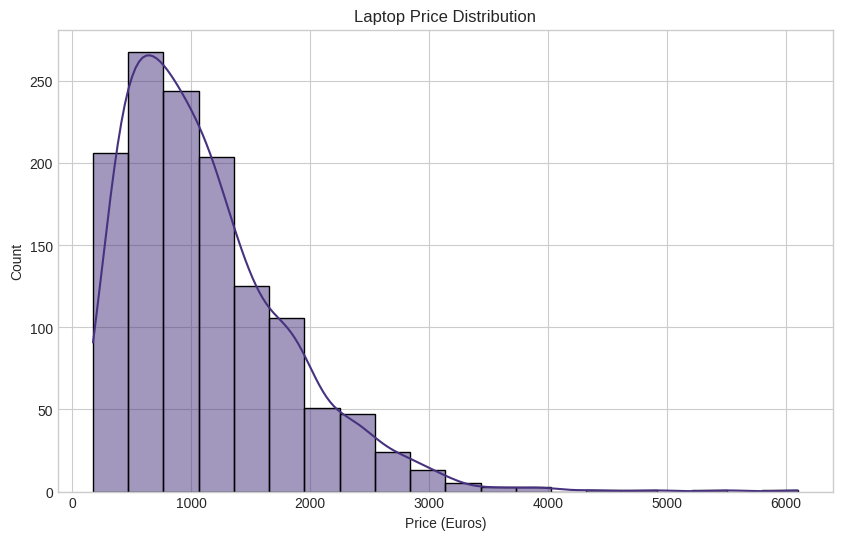

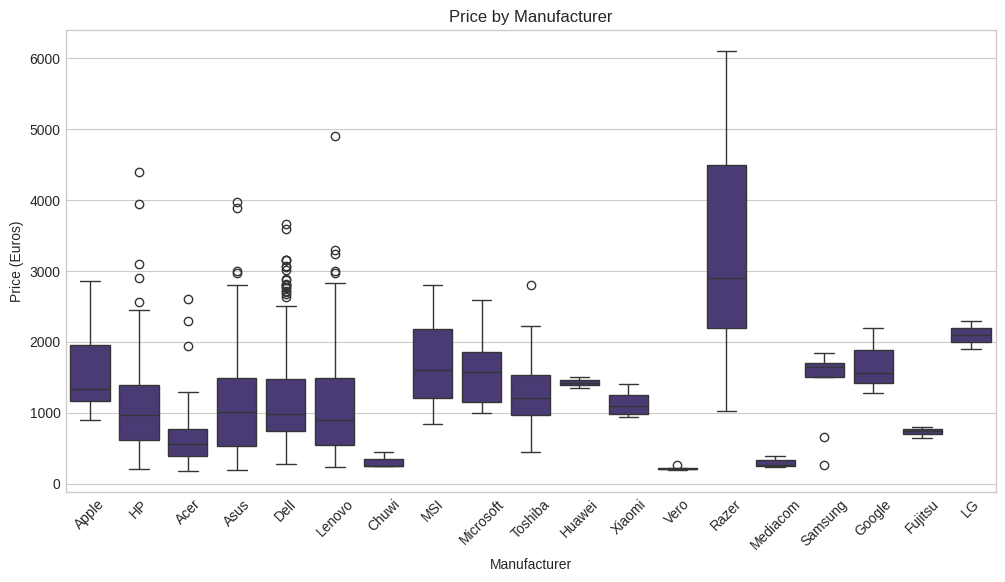

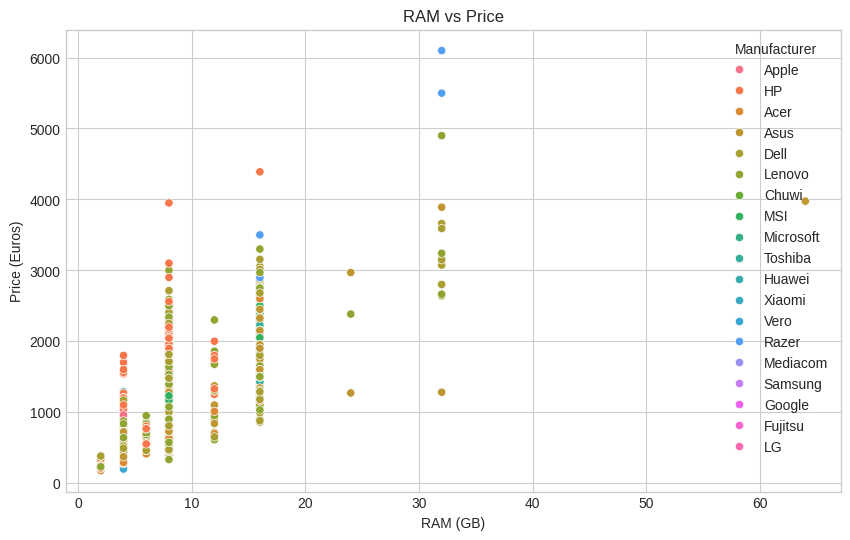

In [42]:
print("Laptops Data Info:")
print(laptops.info())
print("\nLaptops Data Description:")
print(laptops.describe())

# Check for missing values
print("\nLaptops Missing Values:")
print(laptops.isnull().sum())

# Visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(laptops['Price (Euros)'], bins=20, kde=True)
plt.title('Laptop Price Distribution')
plt.xlabel('Price (Euros)')
plt.show()

# Manufacturer vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Manufacturer', y='Price (Euros)', data=laptops)
plt.xticks(rotation=45)
plt.title('Price by Manufacturer')
plt.show()

# RAM vs Price (assuming RAM is in string format like '8GB')
laptops['RAM_clean'] = laptops['RAM'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM_clean', y='Price (Euros)', hue='Manufacturer', data=laptops)
plt.title('RAM vs Price')
plt.xlabel('RAM (GB)')
plt.show()

# Mobiles EDA

Mobiles Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            930 non-null    int64  
 1   Company.Name          930 non-null    object 
 2   Model.Name            930 non-null    object 
 3   Mobile.Weight         930 non-null    object 
 4   RAM                   930 non-null    object 
 5   Front.Camera          930 non-null    object 
 6   Back.Camera           930 non-null    object 
 7   Processor             930 non-null    object 
 8   Battery.Capacity      930 non-null    object 
 9   Screen.Size           930 non-null    object 
 10  Launched.Price..USA.  930 non-null    float64
 11  Launched.Year         930 non-null    int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 87.3+ KB
None

Mobiles Data Description:
       Unnamed: 0  Launched.Price..USA.  Launched.Year
count  930.0

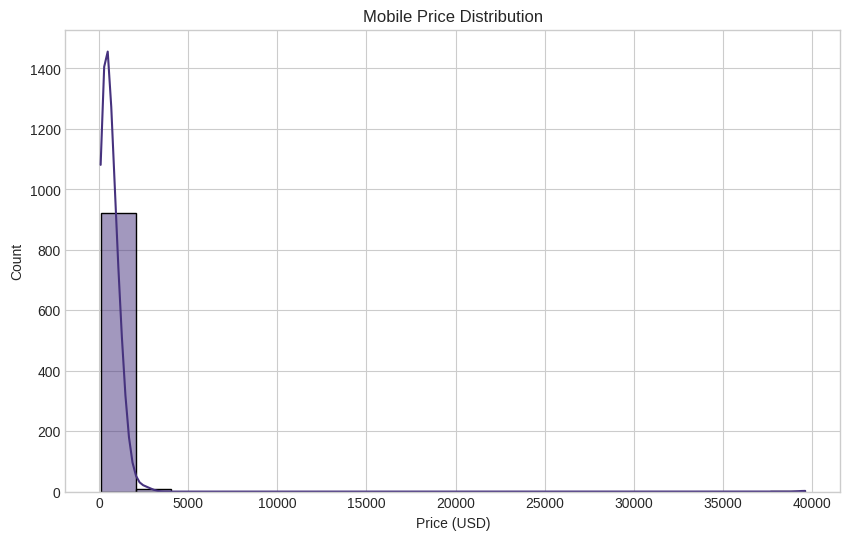

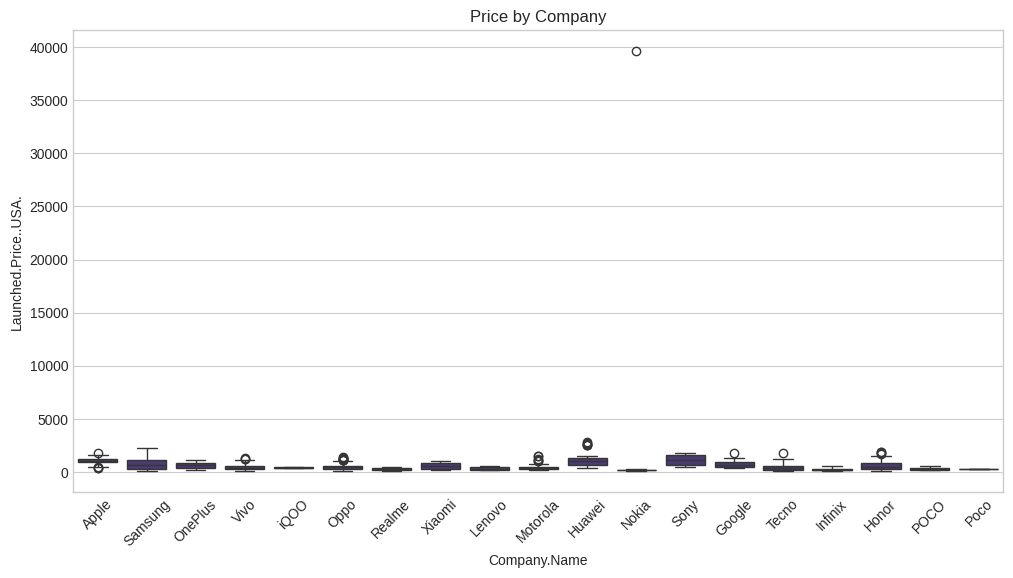

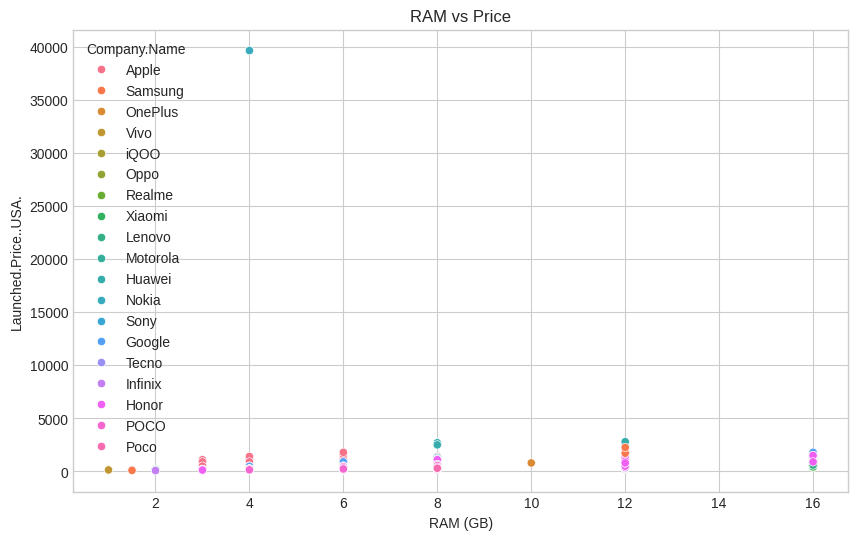

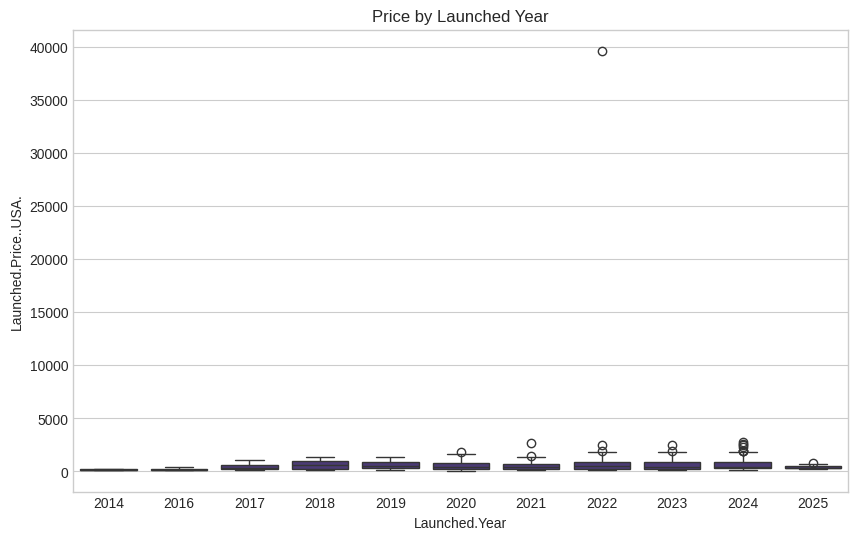

In [48]:
print("Mobiles Data Info:")
print(mobiles.info())
print("\nMobiles Data Description:")
print(mobiles.describe())
print("\nMobiles Missing Values:")
print(mobiles.isnull().sum())

# Clean RAM (take first number for '8 / 12')
mobiles['RAM_clean'] = mobiles['RAM'].str.replace('GB', '').str.split(' / ').str[0].astype(float)

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(mobiles['Launched.Price..USA.'], bins=20, kde=True)
plt.title('Mobile Price Distribution')
plt.xlabel('Price (USD)')
plt.show()

# Company vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company.Name', y='Launched.Price..USA.', data=mobiles)
plt.xticks(rotation=45)
plt.title('Price by Company')
plt.show()

# RAM vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM_clean', y='Launched.Price..USA.', hue='Company.Name', data=mobiles)
plt.title('RAM vs Price')
plt.xlabel('RAM (GB)')
plt.show()

# Launched Year vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Launched.Year', y='Launched.Price..USA.', data=mobiles)
plt.title('Price by Launched Year')
plt.show()

#Scatter Plot: "RAM vs Price"

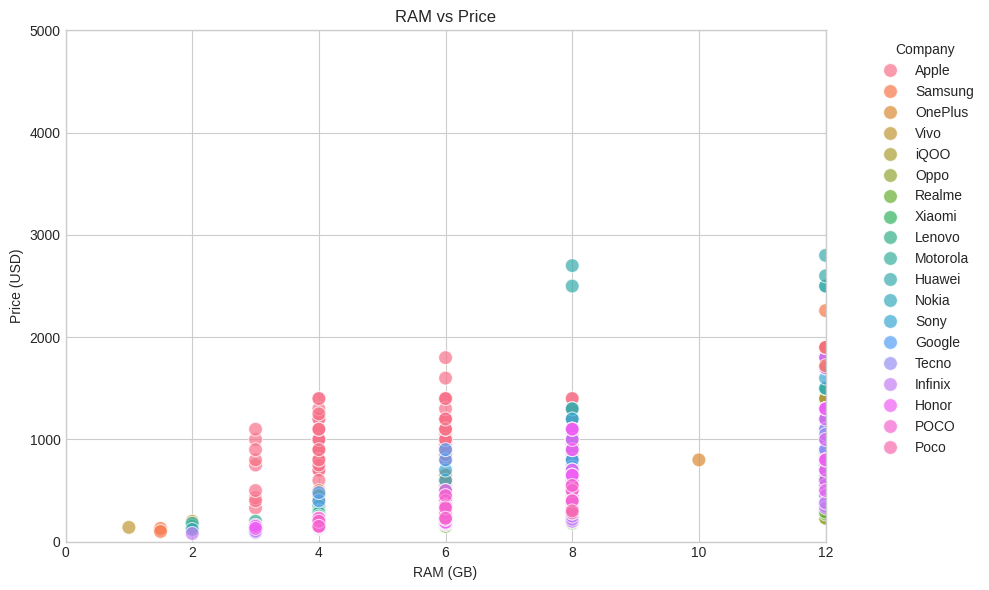

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM_clean', y='Launched.Price..USA.', hue='Company.Name', data=mobiles, s=100, alpha=0.7)
plt.title('RAM vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (USD)')
plt.xlim(0, 12)    # Focus on 0–12 GB RAM
plt.ylim(0, 5000)  # Focus on 0–5,000 USD
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Scatter Plot: "Price by Company"

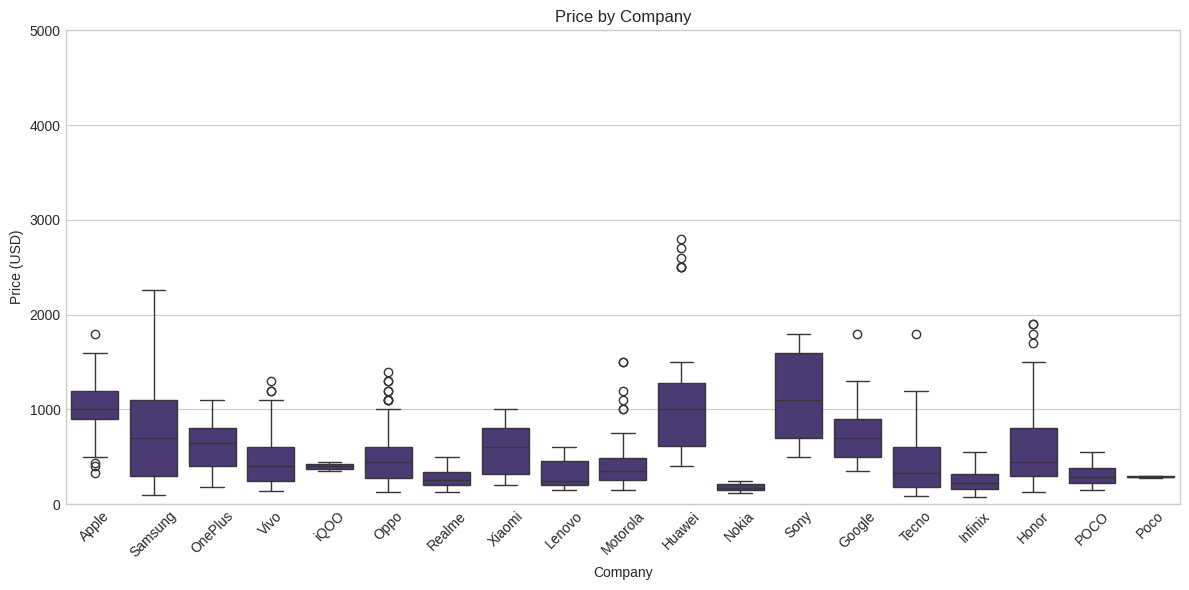

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company.Name', y='Launched.Price..USA.', data=mobiles)
plt.xticks(rotation=45)
plt.title('Price by Company')
plt.xlabel('Company')
plt.ylabel('Price (USD)')
plt.ylim(0, 5000)  # Focus on 0–5,000 USD
plt.tight_layout()
plt.show()

# Histogram: "Mobile Price Distribution"

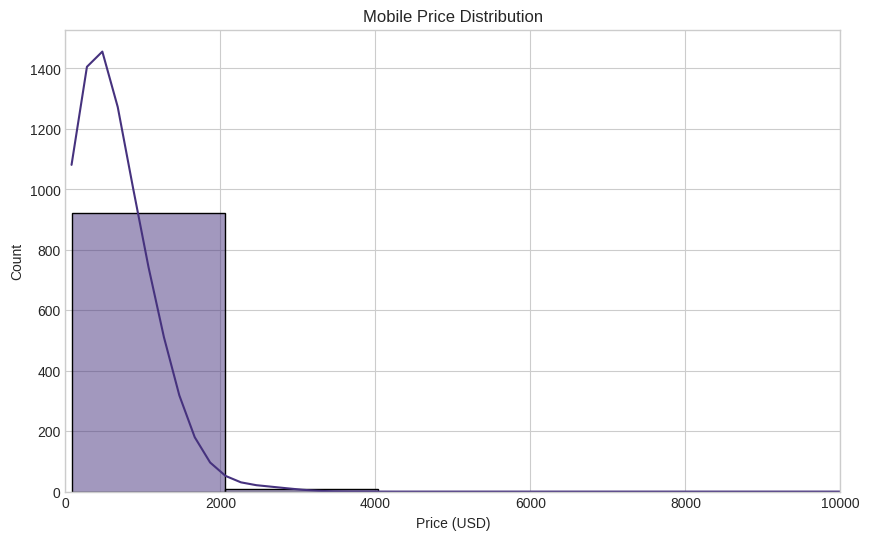

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(mobiles['Launched.Price..USA.'], bins=20, kde=True)
plt.title('Mobile Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Count')

plt.xlim(0, 10000)  # Focus on 0–10,000 USD
plt.show()

# Scatter Plot: "Price by Launched Year"

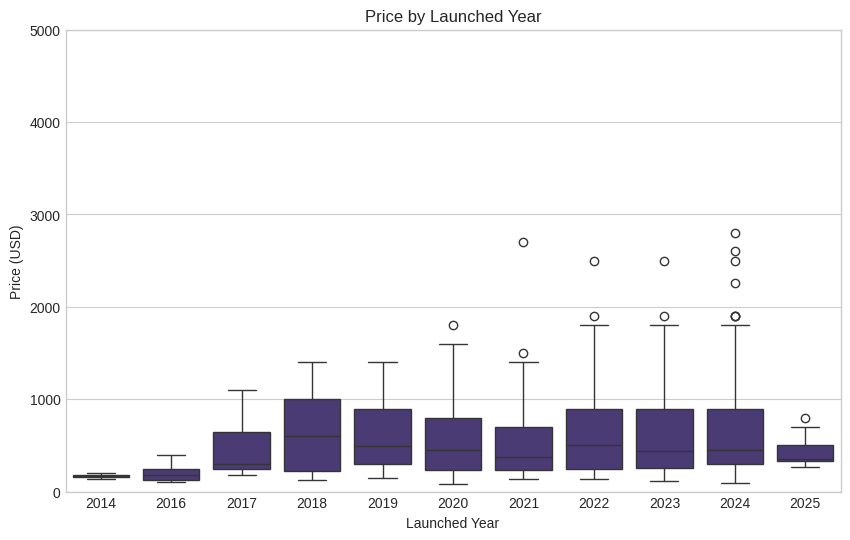

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Launched.Year', y='Launched.Price..USA.', data=mobiles)
plt.title('Price by Launched Year')
plt.xlabel('Launched Year')
plt.ylabel('Price (USD)')
plt.ylim(0, 5000)  # Focus on 0–5,000 USD
plt.show()

# Section 3: Data Cleaning and Preprocessing


In [10]:
# Clean column names - remove spaces and special characters
laptops_df.columns = laptops_df.columns.str.replace(' ', '').str.replace('(', '').str.replace(')', '').str.replace('.', '')
mobiles_df.columns = mobiles_df.columns.str.replace(' ', '').str.replace('(', '').str.replace(')', '').str.replace('.', '')

# --- Laptop Data Preprocessing ---
# Handle missing values
laptops_df = laptops_df.fillna({
    'RAM': laptops_df['RAM'].median(),
    'Weight': laptops_df['Weight'].median(),
    'Price_Euros': laptops_df['Price_Euros'].median()
})

# Convert RAM to numeric (if it contains 'GB', extract the number)
if laptops_df['RAM'].dtype == 'object':
    laptops_df['RAM'] = laptops_df['RAM'].str.extract('(\d+)').astype(float)

# Extract storage capacity as numeric
def extract_storage_size(storage_str):
    if pd.isna(storage_str):
        return np.nan
    # Extract the numeric part
    match = re.search(r'(\d+)', str(storage_str))
    if match:
        size = float(match.group(1))
        # Convert TB to GB if needed
        if 'TB' in str(storage_str):
            size *= 1000
        return size
    return np.nan

if 'Storage' in laptops_df.columns:
    laptops_df['Storage_GB'] = laptops_df['Storage'].apply(extract_storage_size)

# Determine storage type (SSD, HDD, etc.)
def extract_storage_type(storage_str):
    if pd.isna(storage_str):
        return 'Unknown'
    storage_str = str(storage_str).upper()
    if 'SSD' in storage_str:
        return 'SSD'
    elif 'HDD' in storage_str:
        return 'HDD'
    elif 'FLASH' in storage_str:
        return 'Flash'
    elif 'EMMC' in storage_str:
        return 'eMMC'
    elif 'HYBRID' in storage_str or 'SSHD' in storage_str:
        return 'Hybrid'
    else:
        return 'Other'

if 'Storage' in laptops_df.columns:
    laptops_df['Storage_Type'] = laptops_df['Storage'].apply(extract_storage_type)
    # Add storage type as a numeric feature
    laptops_df['Storage_Score'] = laptops_df['Storage_Type'].map({
        'SSD': 3,
        'Flash': 3,
        'Hybrid': 2,
        'HDD': 1,
        'eMMC': 2,
        'Other': 1,
        'Unknown': 1
    })

# Extract CPU information
def extract_cpu_info(cpu_str):
    if pd.isna(cpu_str):
        return 0, 0

    cpu_str = str(cpu_str).upper()

    # Try to extract CPU family (i3, i5, i7, etc.)
    family_match = re.search(r'I(\d+)', cpu_str)
    family = int(family_match.group(1)) if family_match else 0

    # Try to extract clock speed
    speed_match = re.search(r'(\d+\.\d+)GHZ', cpu_str)
    speed = float(speed_match.group(1)) if speed_match else 0

    return family, speed

if 'CPU' in laptops_df.columns:
    cpu_info = laptops_df['CPU'].apply(extract_cpu_info)
    laptops_df['CPU_Family'] = [info[0] for info in cpu_info]
    laptops_df['CPU_Speed'] = [info[1] for info in cpu_info]

# --- Mobile Data Preprocessing ---
# Handle missing values
if 'Launched_Price_USA' in mobiles_df.columns:
    mobiles_df = mobiles_df.fillna({
        'RAM': mobiles_df['RAM'].median(),
        'Mobile_Weight': mobiles_df['Mobile_Weight'].median(),
        'Launched_Price_USA': mobiles_df['Launched_Price_USA'].median(),
        'Battery_Capacity': mobiles_df['Battery_Capacity'].median()
    })

# Convert RAM to numeric if needed
if mobiles_df['RAM'].dtype == 'object':
    mobiles_df['RAM'] = mobiles_df['RAM'].str.extract('(\d+)').astype(float)

# Extract numeric values from price (remove currency symbols, etc.)
if 'Launched_Price_USA' in mobiles_df.columns:
    if mobiles_df['Launched_Price_USA'].dtype == 'object':
        mobiles_df['Price_USD'] = mobiles_df['Launched_Price_USA'].str.extract(r'(\d+(?:\.\d+)?)').astype(float)
    else:
        mobiles_df['Price_USD'] = mobiles_df['Launched_Price_USA']

# Extract camera megapixels
def extract_camera_mp(camera_str):
    if pd.isna(camera_str):
        return 0

    camera_str = str(camera_str).upper()

    # Try to extract megapixels
    mp_match = re.search(r'(\d+)MP', camera_str)
    mp = int(mp_match.group(1)) if mp_match else 0

    # Add bonus for 4K capability
    if '4K' in camera_str:
        mp += 2  # Bonus points for 4K capability

    # Add bonus for multiple cameras
    if '+' in camera_str:
        mp += 5  # Bonus points for multiple camera setup

    return mp

if 'Front_Camera' in mobiles_df.columns and 'Back_Camera' in mobiles_df.columns:
    mobiles_df['Front_Camera_Score'] = mobiles_df['Front_Camera'].apply(extract_camera_mp)
    mobiles_df['Back_Camera_Score'] = mobiles_df['Back_Camera'].apply(extract_camera_mp)

# Extract processor score
def extract_processor_score(processor_str):
    if pd.isna(processor_str):
        return 0

    processor_str = str(processor_str).upper()

    # Score based on processor name
    if 'A17 PRO' in processor_str:
        return 9
    elif 'A17' in processor_str:
        return 8
    elif 'A16' in processor_str:
        return 7
    elif 'A15' in processor_str:
        return 6
    elif 'SNAPDRAGON 8' in processor_str:
        return 8
    elif 'SNAPDRAGON 7' in processor_str:
        return 7
    elif 'SNAPDRAGON' in processor_str:
        return 6
    elif 'DIMENSITY' in processor_str:
        return 7
    elif 'EXYNOS' in processor_str:
        return 7
    else:
        return 5

if 'Processor' in mobiles_df.columns:
    mobiles_df['Processor_Score'] = mobiles_df['Processor'].apply(extract_processor_score)

# Extract storage from model name for mobile phones
def extract_storage_from_model(model_str):
    if pd.isna(model_str):
        return 0

    model_str = str(model_str).upper()
    storage_match = re.search(r'(\d+)GB', model_str)

    if storage_match:
        return int(storage_match.group(1))
    else:
        # Try to find storage in a different format
        storage_match = re.search(r'(\d+) GB', model_str)
        if storage_match:
            return int(storage_match.group(1))

    return 0

mobiles_df['Storage_GB'] = mobiles_df['Model_Name'].apply(extract_storage_from_model)

TypeError: Cannot convert ['8GB' '8GB' '8GB' ... '2GB' '6GB' '4GB'] to numeric

#Section 4: Clustering Analysis for Market Segmentation


KeyError: "Columns not found: 'Price_Euros'"

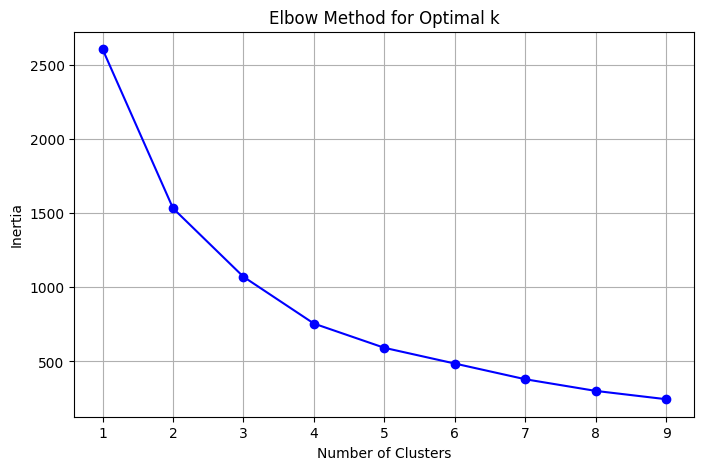

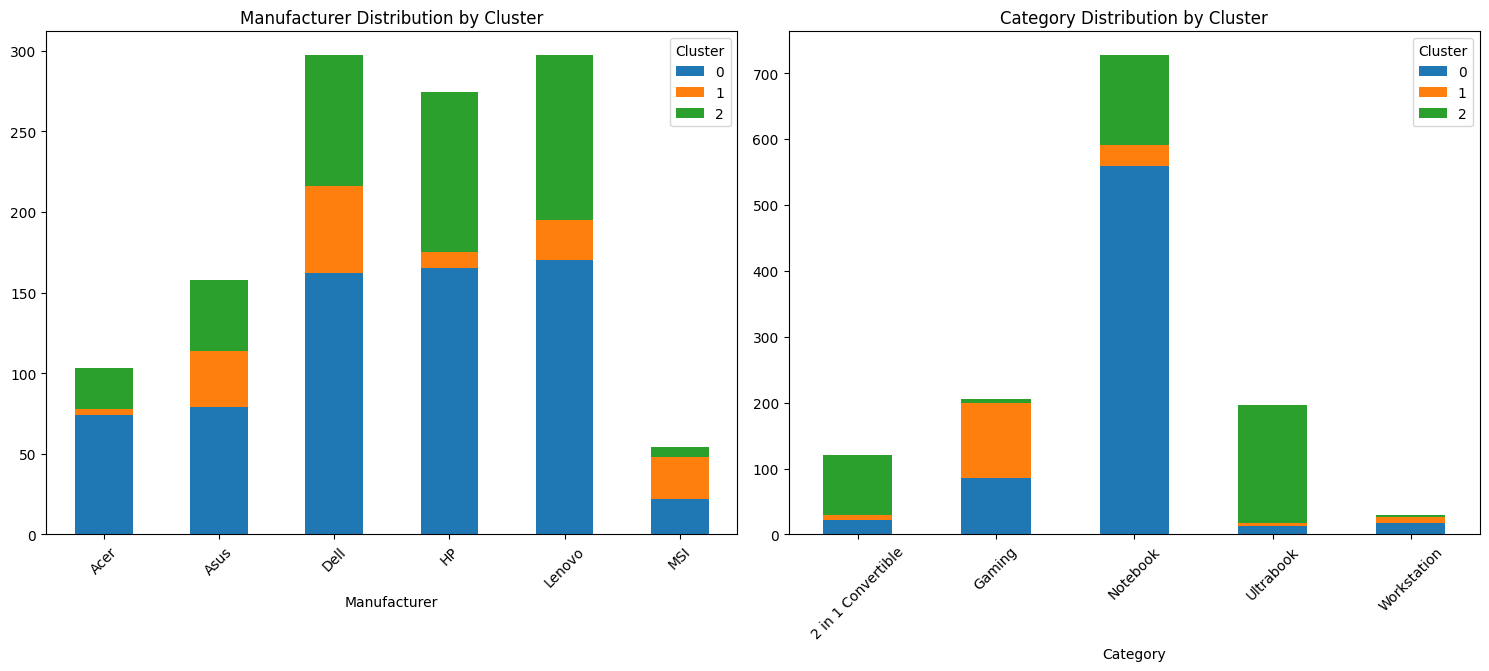

In [18]:
# ---- CLUSTERING ANALYSIS FOR LAPTOPS ----

# Select features for clustering
laptop_cluster_features = []
if 'RAM' in laptops_df.columns:
    laptop_cluster_features.append('RAM')
if 'Storage_GB' in laptops_df.columns:
    laptop_cluster_features.append('Storage_GB')
if 'CPU_Family' in laptops_df.columns:
    laptop_cluster_features.append('CPU_Family')
if 'CPU_Speed' in laptops_df.columns:
    laptop_cluster_features.append('CPU_Speed')
if 'Screen_Size' in laptops_df.columns:
    laptop_cluster_features.append('Screen_Size')
if 'Weight' in laptops_df.columns:
    laptop_cluster_features.append('Weight')
if 'Storage_Score' in laptops_df.columns:
    laptop_cluster_features.append('Storage_Score')

# Filter out rows with missing values for clustering
laptops_for_clustering = laptops_df.dropna(subset=laptop_cluster_features)

if len(laptops_for_clustering) > 0:
    # Standardize the data
    X_cluster = laptops_for_clustering[laptop_cluster_features].copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)

    # Determine optimal number of clusters using the elbow method
    inertia = []
    k_range = range(1, 10)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertia, 'bo-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)

    # Choose optimal k based on elbow method (let's say k=3 for now)
    optimal_k = 3  # This would be determined from the elbow plot

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    laptops_for_clustering['Cluster'] = kmeans.fit_predict(X_scaled)

    # Analyze clusters
    plt.figure(figsize=(15, 12))

    # RAM vs Price by Cluster
    if 'RAM' in laptops_for_clustering.columns and 'Price_Euros' in laptops_for_clustering.columns:
        plt.subplot(2, 2, 1)
        sns.scatterplot(x='RAM', y='Price_Euros', hue='Cluster', data=laptops_for_clustering, palette='viridis')
        plt.title('Laptop Clusters by RAM and Price')

    # CPU Family vs Price by Cluster
    if 'CPU_Family' in laptops_for_clustering.columns and 'Price_Euros' in laptops_for_clustering.columns:
        plt.subplot(2, 2, 2)
        sns.scatterplot(x='CPU_Family', y='Price_Euros', hue='Cluster', data=laptops_for_clustering[laptops_for_clustering['CPU_Family'] > 0], palette='viridis')
        plt.title('Laptop Clusters by CPU Family and Price')

    # Manufacturer distribution by cluster
    if 'Manufacturer' in laptops_for_clustering.columns:
        plt.subplot(2, 2, 3)
        # Get top manufacturers for better visualization
        top_manufacturers = laptops_for_clustering['Manufacturer'].value_counts().head(6).index
        cluster_manufacturer_data = laptops_for_clustering[laptops_for_clustering['Manufacturer'].isin(top_manufacturers)]

        # Create a cross-tabulation of manufacturers and clusters
        manufacturer_cluster_counts = pd.crosstab(cluster_manufacturer_data['Manufacturer'], cluster_manufacturer_data['Cluster'])
        manufacturer_cluster_counts.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title('Manufacturer Distribution by Cluster')
        plt.xticks(rotation=45)
        plt.legend(title='Cluster')

    # Category distribution by cluster
    if 'Category' in laptops_for_clustering.columns:
        plt.subplot(2, 2, 4)
        # Get top categories for better visualization
        top_categories = laptops_for_clustering['Category'].value_counts().head(5).index
        cluster_category_data = laptops_for_clustering[laptops_for_clustering['Category'].isin(top_categories)]

        # Create a cross-tabulation of categories and clusters
        category_cluster_counts = pd.crosstab(cluster_category_data['Category'], cluster_category_data['Cluster'])
        category_cluster_counts.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title('Category Distribution by Cluster')
        plt.xticks(rotation=45)
        plt.legend(title='Cluster')

    plt.tight_layout()

    # Cluster characteristics
    cluster_stats = laptops_for_clustering.groupby('Cluster')[laptop_cluster_features + ['Price_Euros']].mean()
    print("\nCluster Characteristics:")
    print(cluster_stats)

    # Count of laptops in each cluster
    cluster_counts = laptops_for_clustering['Cluster'].value_counts()
    print("\nCount of laptops in each cluster:")
    print(cluster_counts)


# Section 5: Price Prediction Models with Train-Test-Validation Split


In [19]:
# ---- PRICE PREDICTION FOR LAPTOPS ----

# Prepare data for regression
laptop_features = []
if 'RAM' in laptops_df.columns:
    laptop_features.append('RAM')
if 'Storage_GB' in laptops_df.columns:
    laptop_features.append('Storage_GB')
if 'CPU_Family' in laptops_df.columns:
    laptop_features.append('CPU_Family')
if 'CPU_Speed' in laptops_df.columns:
    laptop_features.append('CPU_Speed')
if 'Screen_Size' in laptops_df.columns:
    laptop_features.append('Screen_Size')
if 'Weight' in laptops_df.columns:
    laptop_features.append('Weight')
if 'Storage_Score' in laptops_df.columns:
    laptop_features.append('Storage_Score')

# Filter out rows with missing target or features
laptops_regression = laptops_df.dropna(subset=laptop_features + ['Price_Euros'])

if len(laptops_regression) > 0:
    # One-hot encode categorical variables
    categorical_features = []
    if 'Manufacturer' in laptops_regression.columns:
        categorical_features.append('Manufacturer')
    if 'Category' in laptops_regression.columns:
        categorical_features.append('Category')
    if 'Operating_System' in laptops_regression.columns:
        categorical_features.append('Operating_System')

    X_laptops = laptops_regression[laptop_features].copy()

    # One-hot encode the categorical features if we have any
    if categorical_features:
        # Get the top categories for each categorical feature to reduce dimensionality
        for feature in categorical_features:
            top_values = laptops_regression[feature].value_counts().head(10).index
            laptops_regression[feature] = laptops_regression[feature].apply(lambda x: x if x in top_values else 'Other')

        # Create dummy variables
        for feature in categorical_features:
            dummies = pd.get_dummies(laptops_regression[feature], prefix=feature)
            X_laptops = pd.concat([X_laptops, dummies], axis=1)

    # Train-test-validation split
    # First split into training (60%) and temp (40%)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_laptops,
        laptops_regression['Price_Euros'],
        test_size=0.4,
        random_state=42
    )

    # Split temp into validation (20% of total) and test (20% of total)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp,
        y_temp,
        test_size=0.5,
        random_state=42
    )

    print(f"\nData splits - Training: {X_train.shape[0]}, Validation: {X_val.shape[0]}, Test: {X_test.shape[0]}")

    # Linear regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Evaluate on validation set
    y_val_pred_lr = lr_model.predict(X_val)
    val_rmse_lr = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))
    val_r2_lr = r2_score(y_val, y_val_pred_lr)

    # Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate on validation set
    y_val_pred_rf = rf_model.predict(X_val)
    val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
    val_r2_rf = r2_score(y_val, y_val_pred_rf)

    # Final evaluation on test set
    y_test_pred_lr = lr_model.predict(X_test)
    y_test_pred_rf = rf_model.predict(X_test)

    # Model evaluation
    print("\nLaptop Price Prediction Metrics:")
    print(f"Validation - Linear Regression - RMSE: {val_rmse_lr:.2f}, R²: {val_r2_lr:.2f}")
    print(f"Validation - Random Forest - RMSE: {val_rmse_rf:.2f}, R²: {val_r2_rf:.2f}")
    print(f"Test - Linear Regression - RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_lr)):.2f}, R²: {r2_score(y_test, y_test_pred_lr):.2f}")
    print(f"Test - Random Forest - RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_rf)):.2f}, R²: {r2_score(y_test, y_test_pred_rf):.2f}")

    # Feature importance
    if hasattr(rf_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': rf_model.feature_importances_
        }).sort_values('Importance', ascending=False)

        print("\nFeature Importance for Laptop Price Prediction:")
        print(feature_importance.head(15))

        # Visualize feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
        plt.title('Top 15 Features for Laptop Price Prediction')
        plt.tight_layout()

# ---- PRICE PREDICTION FOR MOBILE PHONES ----

# Prepare data for regression
mobile_features = []
if 'RAM' in mobiles_df.columns:
    mobile_features.append('RAM')
if 'Storage_GB' in mobiles_df.columns:
    mobile_features.append('Storage_GB')
if 'Processor_Score' in mobiles_df.columns:
    mobile_features.append('Processor_Score')
if 'Screen_Size' in mobiles_df.columns:
    mobile_features.append('Screen_Size')
if 'Battery_Capacity' in mobiles_df.columns:
    mobile_features.append('Battery_Capacity')
if 'Mobile_Weight' in mobiles_df.columns:
    mobile_features.append('Mobile_Weight')
if 'Front_Camera_Score' in mobiles_df.columns:
    mobile_features.append('Front_Camera_Score')
if 'Back_Camera_Score' in mobiles_df.columns:
    mobile_features.append('Back_Camera_Score')

# Filter out rows with missing target or features
mobiles_regression = mobiles_df.dropna(subset=mobile_features + ['Price_USD'])

if len(mobiles_regression) > 0:
    # One-hot encode categorical variables
    categorical_features = []
    if 'Company_Name' in mobiles_regression.columns:
        categorical_features.append('Company_Name')
    if 'Launched_Year' in mobiles_regression.columns:
        categorical_features.append('Launched_Year')

    X_mobiles = mobiles_regression[mobile_features].copy()

    # One-hot encode the categorical features if we have any
    if categorical_features:
        # Get the top categories for each categorical feature to reduce dimensionality
        for feature in categorical_features:
            top_values = mobiles_regression[feature].value_counts().head(10).index
            mobiles_regression[feature] = mobiles_regression[feature].apply(lambda x: x if x in top_values else 'Other')

        # Create dummy variables
        for feature in categorical_features:
            dummies = pd.get_dummies(mobiles_regression[feature], prefix=feature)
            X_mobiles = pd.concat([X_mobiles, dummies], axis=1)

    # Train-test-validation split
    # First split into training (60%) and temp (40%)
    X_train_m, X_temp_m, y_train_m, y_temp_m = train_test_split(
        X_mobiles,
        mobiles_regression['Price_USD'],
        test_size=0.4,
        random_state=42
    )

    # Split temp into validation (20% of total) and test (20% of total)
    X_val_m, X_test_m, y_val_m, y_test_m = train_test_split(
        X_temp_m,
        y_temp_m,
        test_size=0.5,
        random_state=42
    )

    print(f"\nMobile data splits - Training: {X_train_m.shape[0]}, Validation: {X_val_m.shape[0]}, Test: {X_test_m.shape[0]}")

    # Linear regression model
    lr_model_m = LinearRegression()
    lr_model_m.fit(X_train_m, y_train_m)

    # Evaluate on validation set
    y_val_pred_lr_m = lr_model_m.predict(X_val_m)
    val_rmse_lr_m = np.sqrt(mean_squared_error(y_val_m, y_val_pred_lr_m))
    val_r2_lr_m = r2_score(y_val_m, y_val_pred_lr_m)

    # Random Forest model
    rf_model_m = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model_m.fit(X_train_m, y_train_m)

    # Evaluate on validation set
    y_val_pred_rf_m = rf_model_m.predict(X_val_m)
    val_rmse_rf_m = np.sqrt(mean_squared_error(y_val_m, y_val_pred_rf_m))
    val_r2_rf_m = r2_score(y_val_m, y_val_pred_rf_m)

    # Final evaluation on test set
    y_test_pred_lr_m = lr_model_m.predict(X_test_m)
    y_test_pred_rf_m = rf_model_m.predict(X_test_m)

    # Model evaluation
    print("\nMobile Phone Price Prediction Metrics:")

KeyError: ['Price_Euros']

# unique Laptop Weights

In [73]:
# Load data
laptops = pd.read_csv('laptops.csv', encoding='latin-1')
mobiles = pd.read_csv('Mobiles.csv', encoding='latin-1')

# --- Data Cleaning and Preparation ---
# Clean price data
laptops['Price (Euros)'] = laptops['Price (Euros)'].str.replace(',', '.').astype(float)

# Convert RAM and Storage to numeric
laptops['RAM_GB'] = laptops['RAM'].str.extract('(\d+)').astype(float)
laptops['Storage_GB'] = laptops[' Storage'].str.extract('(\d+)').astype(float)

# Clean Screen Size
laptops['Screen_Size_Inches'] = laptops['Screen Size'].str.replace('"', '').astype(float)

# Clean Weight - Handle invalid values
print("Unique Weight values:", laptops['Weight'].unique())  # Debug: Check for invalid entries


Unique Weight values: ['1.37kg' '1.34kg' '1.86kg' '1.83kg' '2.1kg' '2.04kg' '1.3kg' '1.6kg'
 '2.2kg' '0.92kg' '1.22kg' '0.98kg' '2.5kg' '1.62kg' '1.91kg' '2.3kg'
 '1.35kg' '1.88kg' '1.89kg' '1.65kg' '2.71kg' '1.2kg' '1.44kg' '2.8kg'
 '2kg' '2.65kg' '2.77kg' '3.2kg' '0.69kg' '1.49kg' '2.4kg' '2.13kg'
 '2.43kg' '1.7kg' '1.4kg' '1.8kg' '1.9kg' '3kg' '1.252kg' '2.7kg' '2.02kg'
 '1.63kg' '1.96kg' '1.21kg' '2.45kg' '1.25kg' '1.5kg' '2.62kg' '1.38kg'
 '1.58kg' '1.85kg' '1.23kg' '1.26kg' '2.16kg' '2.36kg' '2.05kg' '1.32kg'
 '1.75kg' '0.97kg' '2.9kg' '2.56kg' '1.48kg' '1.74kg' '1.1kg' '1.56kg'
 '2.03kg' '1.05kg' '4.4kg' '1.90kg' '1.29kg' '2.0kg' '1.95kg' '2.06kg'
 '1.12kg' '1.42kg' '3.49kg' '3.35kg' '2.23kg' '4.42kg' '2.69kg' '2.37kg'
 '4.7kg' '3.6kg' '2.08kg' '4.3kg' '1.68kg' '1.41kg' '4.14kg' '2.18kg'
 '2.24kg' '2.67kg' '2.14kg' '1.36kg' '2.25kg' '2.15kg' '2.19kg' '2.54kg'
 '3.42kg' '1.28kg' '2.33kg' '1.45kg' '2.79kg' '1.84kg' '2.6kg' '2.26kg'
 '3.25kg' '1.59kg' '1.13kg' '1.78kg' '1.10kg' '1.

In [74]:
laptops['Weight'] = laptops['Weight'].replace('4s', np.nan)  # Replace '4s' with NaN
laptops['Weight_kg'] = laptops['Weight'].str.replace('kg', '').astype(float)  # Remove 'kg' and convert
laptops['Weight_kg'] = laptops['Weight_kg'].fillna(laptops['Weight_kg'].mean())  # Fill NaN with mean

# Refine CPU_GHz extraction to target GHz value
laptops['CPU_GHz'] = laptops['CPU'].str.extract('(\d+\.?\d*)GHz').astype(float).fillna(0)

# Clean mobile price
mobiles['Launched.Price..USA.'] = mobiles['Launched.Price..USA.'].str.replace('USD ', '').astype(float)

# --- Split the Data in Train, Test, Validation Data to Get Performance of Model ---
# Split laptop data for price prediction
X_laptops = pd.get_dummies(laptops[['CPU', 'RAM', ' Storage', 'GPU', 'Screen Size', 'Weight', 'Manufacturer']])
y_laptops = laptops['Price (Euros)']
X_train, X_temp, y_train, y_temp = train_test_split(X_laptops, y_laptops, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 0.3 * 0.5 = 0.15 for validation

# Split mobile data for comparison
X_mobiles = pd.get_dummies(mobiles[['Processor', 'RAM', 'Battery.Capacity', 'Screen.Size', 'Company.Name']])
y_mobiles = mobiles['Launched.Price..USA.']

# --- Price Prediction ---
# Predict laptop prices using specs
model_laptops = LinearRegression().fit(X_train, y_train)
train_score = model_laptops.score(X_train, y_train)
test_score = model_laptops.score(X_test, y_test)
val_score = model_laptops.score(X_val, y_val)
print("Price Prediction Scores:")
print(f"Train R² Score: {train_score:.4f}")
print(f"Test R² Score: {test_score:.4f}")
print(f"Validation R² Score: {val_score:.4f}")

# --- Predicting Prices Using Specs (and Doing a Regression for Brand Value) ---
# Compare with and without Manufacturer
X_laptops_no_brand = pd.get_dummies(laptops[['CPU', 'RAM', ' Storage', 'GPU', 'Screen Size', 'Weight']])
X_train_no_brand, X_temp_no_brand, y_train_no_brand, y_temp_no_brand = train_test_split(X_laptops_no_brand, y_laptops, test_size=0.3, random_state=42)
X_test_no_brand, X_val_no_brand, y_test_no_brand, y_val_no_brand = train_test_split(X_temp_no_brand, y_temp_no_brand, test_size=0.5, random_state=42)
model_no_brand = LinearRegression().fit(X_train_no_brand, y_train_no_brand)
print("\nPrice Prediction without Brand Value:")
print(f"Test R² Score without Brand: {model_no_brand.score(X_test_no_brand, y_test_no_brand):.4f}")
brand_impact = test_score - model_no_brand.score(X_test_no_brand, y_test_no_brand)
print(f"Estimated Brand Value Impact on R²: {brand_impact:.4f}")

# --- Feature Comparison ---
print("\nFeature Comparison by Manufacturer:")
feature_df = laptops.groupby('Manufacturer')[['RAM_GB', 'CPU_GHz', 'Storage_GB']].mean().reset_index()
print(feature_df)

# --- Clustering ---
X_cluster = laptops[['RAM_GB', 'Storage_GB', 'Screen_Size_Inches', 'Weight_kg']].fillna(0)
scaler = StandardScaler().fit(X_cluster)
X_scaled = scaler.transform(X_cluster)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
laptops['Cluster'] = kmeans.labels_
print("\nCluster Analysis by Manufacturer:")
print(laptops.groupby('Cluster')['Manufacturer'].value_counts())

# --- Statistically Test for Moore’s Law (Is Computational Power Getting Cheaper with Time) ---
mobiles['Price_per_RAM'] = mobiles['Launched.Price..USA.'] / mobiles['RAM']
moore_trend = mobiles.groupby('Launched.Year')['Price_per_RAM'].mean()
print("\nMoore's Law Check (Average Price per RAM by Year):")
print(moore_trend)
plt.figure(figsize=(8, 5))
plt.plot(moore_trend.index, moore_trend.values, marker='o')
plt.xlabel('Launch Year')
plt.ylabel('Average Price per RAM (USD/GB)')
plt.title("Moore's Law Trend")
plt.show()

# --- Compare Similar Analyses with Mobile Phone Data, Check if the Same Things Matter in Price ---
X_train_mobiles, X_test_mobiles, y_train_mobiles, y_test_mobiles = train_test_split(X_mobiles, y_mobiles, test_size=0.3, random_state=42)
model_mobiles = LinearRegression().fit(X_train_mobiles, y_train_mobiles)
mobile_score = model_mobiles.score(X_test_mobiles, y_test_mobiles)
print("\nMobile Price Prediction R² Score:", mobile_score)
print("Laptop Feature Importance (sample coefficients):", model_laptops.coef_[:5])
print("Mobile Feature Importance (sample coefficients):", model_mobiles.coef_[:5])

# --- EDA ---
plt.figure(figsize=(8, 5))
laptops['Price (Euros)'].hist()
plt.title('Price Distribution (Laptops)')
plt.xlabel('Price (Euros)')
plt.show()

plt.figure(figsize=(8, 5))
mobiles['Launched.Price..USA.'].hist()
plt.title('Price Distribution (Mobiles)')
plt.xlabel('Price (USD)')
plt.show()

plt.figure(figsize=(8, 5))
laptops.boxplot(column='Price (Euros)', by='Manufacturer')
plt.title('Price by Manufacturer (Laptops)')
plt.xticks(rotation=45)
plt.show()
laptops = pd.read_csv('laptops.csv', encoding='latin-1')
mobiles = pd.read_csv('Mobiles.csv', encoding='latin-1')

# --- Data Cleaning and Preparation ---
# Clean price data
laptops['Price (Euros)'] = laptops['Price (Euros)'].str.replace(',', '.').astype(float)

# Convert RAM and Storage to numeric
laptops['RAM_GB'] = laptops['RAM'].str.extract('(\d+)').astype(float)
laptops['Storage_GB'] = laptops[' Storage'].str.extract('(\d+)').astype(float)

# Clean Screen Size
laptops['Screen_Size_Inches'] = laptops['Screen Size'].str.replace('"', '').astype(float)

# Clean Weight - Handle invalid values
print("Unique Weight values:", laptops['Weight'].unique())  # Debug: Check for invalid entries
laptops['Weight'] = laptops['Weight'].replace('4s', np.nan)  # Replace '4s' with NaN
laptops['Weight_kg'] = laptops['Weight'].str.replace('kg', '').astype(float)  # Remove 'kg' and convert
laptops['Weight_kg'] = laptops['Weight_kg'].fillna(laptops['Weight_kg'].mean())  # Fill NaN with mean

# Refine CPU_GHz extraction to target GHz value
laptops['CPU_GHz'] = laptops['CPU'].str.extract('(\d+\.?\d*)GHz').astype(float).fillna(0)

# Clean mobile price
mobiles['Launched.Price..USA.'] = mobiles['Launched.Price..USA.'].str.replace('USD ', '').astype(float)

# --- Split the Data in Train, Test, Validation Data to Get Performance of Model ---
# Split laptop data for price prediction
X_laptops = pd.get_dummies(laptops[['CPU', 'RAM', ' Storage', 'GPU', 'Screen Size', 'Weight', 'Manufacturer']])
y_laptops = laptops['Price (Euros)']
X_train, X_temp, y_train, y_temp = train_test_split(X_laptops, y_laptops, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 0.3 * 0.5 = 0.15 for validation

# Split mobile data for comparison
X_mobiles = pd.get_dummies(mobiles[['Processor', 'RAM', 'Battery.Capacity', 'Screen.Size', 'Company.Name']])
y_mobiles = mobiles['Launched.Price..USA.']

# --- Price Prediction ---
# Predict laptop prices using specs
model_laptops = LinearRegression().fit(X_train, y_train)
train_score = model_laptops.score(X_train, y_train)
test_score = model_laptops.score(X_test, y_test)
val_score = model_laptops.score(X_val, y_val)
print("Price Prediction Scores:")
print(f"Train R² Score: {train_score:.4f}")
print(f"Test R² Score: {test_score:.4f}")
print(f"Validation R² Score: {val_score:.4f}")

# --- Predicting Prices Using Specs (and Doing a Regression for Brand Value) ---
# Compare with and without Manufacturer
X_laptops_no_brand = pd.get_dummies(laptops[['CPU', 'RAM', ' Storage', 'GPU', 'Screen Size', 'Weight']])
X_train_no_brand, X_temp_no_brand, y_train_no_brand, y_temp_no_brand = train_test_split(X_laptops_no_brand, y_laptops, test_size=0.3, random_state=42)
X_test_no_brand, X_val_no_brand, y_test_no_brand, y_val_no_brand = train_test_split(X_temp_no_brand, y_temp_no_brand, test_size=0.5, random_state=42)
model_no_brand = LinearRegression().fit(X_train_no_brand, y_train_no_brand)
print("\nPrice Prediction without Brand Value:")
print(f"Test R² Score without Brand: {model_no_brand.score(X_test_no_brand, y_test_no_brand):.4f}")
brand_impact = test_score - model_no_brand.score(X_test_no_brand, y_test_no_brand)
print(f"Estimated Brand Value Impact on R²: {brand_impact:.4f}")

# --- Feature Comparison ---
print("\nFeature Comparison by Manufacturer:")
feature_df = laptops.groupby('Manufacturer')[['RAM_GB', 'CPU_GHz', 'Storage_GB']].mean().reset_index()
print(feature_df)

# --- Clustering ---
X_cluster = laptops[['RAM_GB', 'Storage_GB', 'Screen_Size_Inches', 'Weight_kg']].fillna(0)
scaler = StandardScaler().fit(X_cluster)
X_scaled = scaler.transform(X_cluster)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
laptops['Cluster'] = kmeans.labels_
print("\nCluster Analysis by Manufacturer:")
print(laptops.groupby('Cluster')['Manufacturer'].value_counts())

# --- Statistically Test for Moore’s Law (Is Computational Power Getting Cheaper with Time) ---
mobiles['Price_per_RAM'] = mobiles['Launched.Price..USA.'] / mobiles['RAM']
moore_trend = mobiles.groupby('Launched.Year')['Price_per_RAM'].mean()
print("\nMoore's Law Check (Average Price per RAM by Year):")
print(moore_trend)
plt.figure(figsize=(8, 5))
plt.plot(moore_trend.index, moore_trend.values, marker='o')
plt.xlabel('Launch Year')
plt.ylabel('Average Price per RAM (USD/GB)')
plt.title("Moore's Law Trend")
plt.show()

# --- Compare Similar Analyses with Mobile Phone Data, Check if the Same Things Matter in Price ---
X_train_mobiles, X_test_mobiles, y_train_mobiles, y_test_mobiles = train_test_split(X_mobiles, y_mobiles, test_size=0.3, random_state=42)
model_mobiles = LinearRegression().fit(X_train_mobiles, y_train_mobiles)
mobile_score = model_mobiles.score(X_test_mobiles, y_test_mobiles)
print("\nMobile Price Prediction R² Score:", mobile_score)
print("Laptop Feature Importance (sample coefficients):", model_laptops.coef_[:5])
print("Mobile Feature Importance (sample coefficients):", model_mobiles.coef_[:5])

# --- EDA ---
plt.figure(figsize=(8, 5))
laptops['Price (Euros)'].hist()
plt.title('Price Distribution (Laptops)')
plt.xlabel('Price (Euros)')
plt.show()

plt.figure(figsize=(8, 5))
mobiles['Launched.Price..USA.'].hist()
plt.title('Price Distribution (Mobiles)')
plt.xlabel('Price (USD)')
plt.show()

plt.figure(figsize=(8, 5))
laptops.boxplot(column='Price (Euros)', by='Manufacturer')
plt.title('Price by Manufacturer (Laptops)')
plt.xticks(rotation=45)
plt.show()

ValueError: could not convert string to float: '4s'